<h3>Ramo</h3>

<p>Start with Stag Hunt.</p>

In [1]:
import numpy as np
from ramo.game.monfg import MONFG
from ramo.utility_function.functions import get_u
from ramo.strategy.best_response import calc_best_response
from ramo.nash.verify import verify_nash


def u_linear(w):
    return lambda p: (p[0] * w) + (p[1] * (1-w))


# stag hunt
payoffs = [np.array([[(5, 0), (0, 0)],
                     [(2, 0), (1, 0)]], dtype=float),
           np.array([[(0, 5), (0, 2)],
                     [(0, 0), (0, 1)]], dtype=float)]

game = MONFG(payoffs)
row_player = 0  # variable with player index
col_player = 1  # variable with player index
row_payoffs = game.get_payoff_matrix(row_player)
col_payoffs = game.get_payoff_matrix(col_player)

# Player 1(row), uses the first np array in payoffs, so it is e.g. (5,0) so (p[0] * w) will be 5 * 1
# Player 2(col), uses the second np array in payoffs, so it is e.g. (0,5) so (p[1] * (1-w)) will be 5 * (1 - 0)
# Note: (p[0] * w) and (p[1] * (1-w)) are specified in utility function - u_linear(). 
# Refer to spreadsheet in C:\Users\KOBrien\OneDrive - Atlantic TU\semester2_2023\PhD\NFG_Best_Responses\ramo\utility_function.xlsx
w1_row = 1.0 
w1_col = 0.0

u_row = u_linear(w1_row)
u_col = u_linear(w1_col)
u_tpl = (u_row, u_col)

row_best=[]
col_best=[]
increments=[]
incr = 0
while incr <= 1:
    joint_strategy = [np.array([incr, 1-incr]), np.array([incr, 1-incr])]
    row_best_response = calc_best_response(u_row, row_player, row_payoffs, joint_strategy)
    col_best_response = calc_best_response(u_col, col_player, col_payoffs, joint_strategy)
    #print("row_best_response", row_best_response)
    #print("col_best_response", col_best_response)
    row_best.append(row_best_response[0])
    col_best.append(col_best_response[0])
    increments.append(incr)
    incr += 0.01
# joint_strat = [np.array([1.0, 0.0]), np.array([1.0, 0.0])]
# vNE = verify_nash(game, u_tpl, joint_strat)
# print(vNE)

#print("row_player:",row_best)
#print("col_player:",col_best)
#print("increments:",increments)


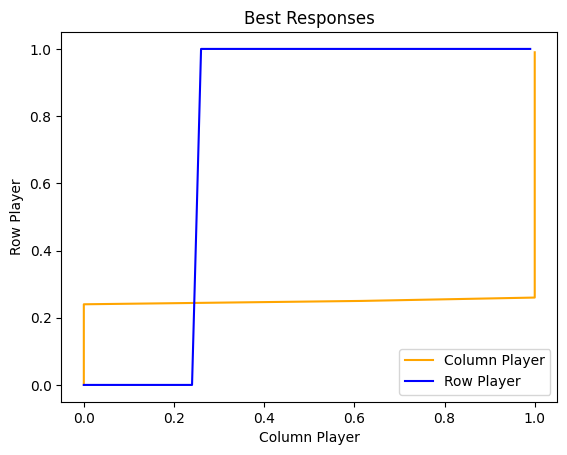

In [2]:
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 


# Column player actions
x_values = col_best 
y_values = increments
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = increments  
y_values = row_best  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<p>Results are comparable using ramo as with my solution</p>

<h3>Matching Pennies</h3>

In [3]:
# matching pennies
payoffs = [np.array([[(1, 0), (-1, 0)],
                     [(-1, 0), (1, 0)]], dtype=float),
           np.array([[(0, -1), (0, 1)],
                     [(0, 1), (0, -1)]], dtype=float)] # issue with this payoff, had (1, 0) instead of (0, 1) - output graph now as expected.

# prisoner's dilemma
# payoffs = [np.array([[(2, 0), (0, 0)],
#                      [(3, 0), (1, 0)]], dtype=float),
#            np.array([[(0, 2), (0, 3)],
#                      [(0, 0), (0, 1)]], dtype=float)]

game = MONFG(payoffs)
row_player = 0  # variable with player index
col_player = 1  # variable with player index
row_payoffs = game.get_payoff_matrix(row_player)
col_payoffs = game.get_payoff_matrix(col_player)

w1_row = 1.0
w1_col = 0.0
u_row = u_linear(w1_row)
u_col = u_linear(w1_col)
u_tpl = (u_row, u_col)

row_best=[]
col_best=[]
increments=[]
incr = 0
while incr <= 1:
    joint_strategy = [np.array([incr, 1-incr]), np.array([incr, 1-incr])]
    row_best_response = calc_best_response(u_row, row_player, row_payoffs, joint_strategy)
    col_best_response = calc_best_response(u_col, col_player, col_payoffs, joint_strategy)
    row_best.append(row_best_response[0])
    col_best.append(col_best_response[0])
    increments.append(incr)
    incr += 0.01


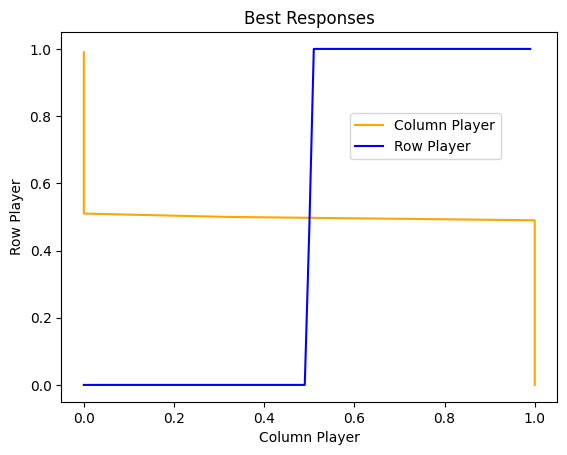

In [5]:
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 


# Column player actions
x_values = col_best 
y_values = increments
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = increments  
y_values = row_best  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
x = 0.9
y = 0.8
plt.legend(loc='upper right', bbox_to_anchor=(x, y))
plt.show()

<p>
Results are comparable for matching pennies. It is the same for row and column player in both ramo and my solution, flip occurs at 0.5 in both.
</p>

<h3>Prisoner Dilemma</h3>


In [17]:
# matching pennies
# payoffs = [np.array([[(1, 0), (-1, 0)],
#                      [(-1, 0), (1, 0)]], dtype=float),
#            np.array([[(0, -1), (0, 1)],
#                      [(1, 0), (0, -1)]], dtype=float)]

# prisoner's dilemma
payoffs = [np.array([[(2, 0), (0, 0)],
                     [(3, 0), (1, 0)]], dtype=float),
           np.array([[(0, 2), (0, 3)],
                     [(0, 0), (0, 1)]], dtype=float)]

game = MONFG(payoffs)
row_player = 0  # variable with player index
col_player = 1  # variable with player index
row_payoffs = game.get_payoff_matrix(row_player)
col_payoffs = game.get_payoff_matrix(col_player)

w1_row = 1.0
w1_col = 0.0
u_row = u_linear(w1_row)
u_col = u_linear(w1_col)
u_tpl = (u_row, u_col)

row_best=[]
col_best=[]
increments=[]
incr = 0
while incr <= 1:
    joint_strategy = [np.array([incr, 1-incr]), np.array([incr, 1-incr])]
    row_best_response = calc_best_response(u_row, row_player, row_payoffs, joint_strategy)
    col_best_response = calc_best_response(u_col, col_player, col_payoffs, joint_strategy)
    row_best.append(row_best_response[0])
    col_best.append(col_best_response[0])
    increments.append(incr)
    incr += 0.01


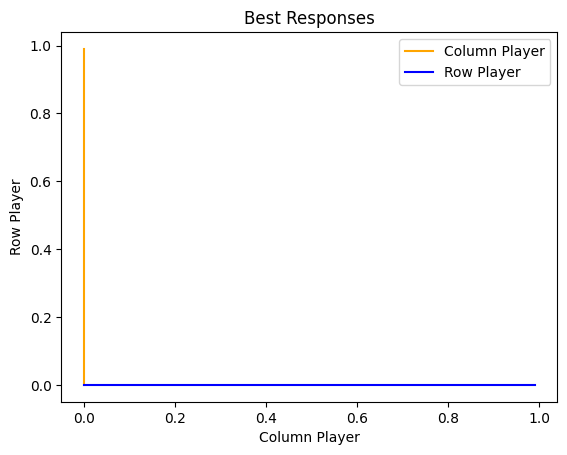

In [18]:
import matplotlib.pyplot as plt

# increments values for use on both x and y axis 


# Column player actions
x_values = col_best 
y_values = increments
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = increments  
y_values = row_best  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<p>
Results are as expected.
</p>

<h3>Nashpy</h3>

In [1]:
# Prisoner Dilemma
import nashpy as nash
import numpy as np

def best_responses(incr, game, player):
    responses = []
    incr = incr
    count = 1/incr
    x, y, outer, inner = 0, 0, 0, 0
    while outer <= count:
        if player == 1:
            row = np.array([x, 1-x])
        else:
            col = np.array([x, 1-x])
        while inner <= count:
            if player == 1:
                col = np.array([y, 1-y])
                best = game.is_best_response(row, col)
            else:
                row = np.array([y, 1-y])
                best = game.is_best_response(col, row)
            if (best[0] and player == 1) or (best[1] and player == 2):
                resp = [x, y]
                responses.append(resp)
            inner += 1
            y += incr
        inner, y = 0, 0
        outer += 1
        x += incr
    outer, x = 0, 0
    return responses

A = np.array([[2, 0], [3, 1]])
B = np.array([[2, 3], [0, 1]])

prisoners_dilemma = nash.Game(A, B)
#print(prisoners_dilemma)

incrs = 0.01
row_best_responses = best_responses(incrs, prisoners_dilemma, 1)

print("row:",row_best_responses)

col_best_responses = best_responses(incrs, prisoners_dilemma, 2)

print("col:",col_best_responses)


row: [[0, 0], [0, 0.01], [0, 0.02], [0, 0.03], [0, 0.04], [0, 0.05], [0, 0.060000000000000005], [0, 0.07], [0, 0.08], [0, 0.09], [0, 0.09999999999999999], [0, 0.10999999999999999], [0, 0.11999999999999998], [0, 0.12999999999999998], [0, 0.13999999999999999], [0, 0.15], [0, 0.16], [0, 0.17], [0, 0.18000000000000002], [0, 0.19000000000000003], [0, 0.20000000000000004], [0, 0.21000000000000005], [0, 0.22000000000000006], [0, 0.23000000000000007], [0, 0.24000000000000007], [0, 0.25000000000000006], [0, 0.26000000000000006], [0, 0.2700000000000001], [0, 0.2800000000000001], [0, 0.2900000000000001], [0, 0.3000000000000001], [0, 0.3100000000000001], [0, 0.3200000000000001], [0, 0.3300000000000001], [0, 0.34000000000000014], [0, 0.35000000000000014], [0, 0.36000000000000015], [0, 0.37000000000000016], [0, 0.38000000000000017], [0, 0.3900000000000002], [0, 0.4000000000000002], [0, 0.4100000000000002], [0, 0.4200000000000002], [0, 0.4300000000000002], [0, 0.4400000000000002], [0, 0.4500000000000

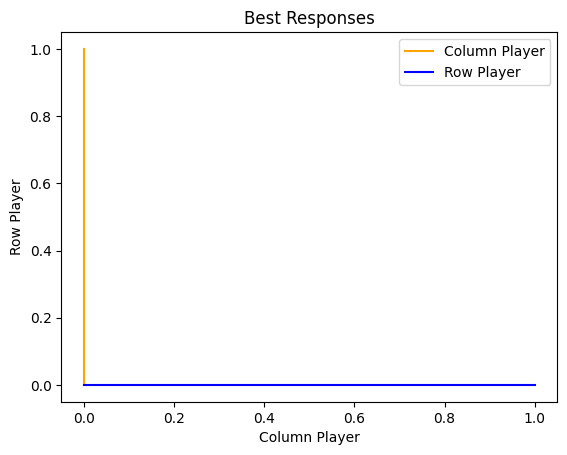

In [2]:
import matplotlib.pyplot as plt

# Column player actions
x_values = [sublist[1] for sublist in col_best_responses] 
y_values = [sublist[0] for sublist in col_best_responses]
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = y_values  
y_values = [sublist[0] for sublist in row_best_responses]  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
plt.legend()
plt.show()

<h3>Matching Pennies</h3>

In [3]:
A = np.array([[1, -1], [-1, 1]])

pennies = nash.Game(A)
#print(pennies)
# row = np.array([1,0])
# col = np.array([0,1])
# best = pennies.is_best_response(row, col)
# print(best)
incrs = 0.01
row_best_responses = best_responses(incrs, pennies, 1)

print("row:",row_best_responses)

col_best_responses = best_responses(incrs, pennies, 2)

print("col:",col_best_responses)


row: [[0, 0], [0, 0.01], [0, 0.02], [0, 0.03], [0, 0.04], [0, 0.05], [0, 0.060000000000000005], [0, 0.07], [0, 0.08], [0, 0.09], [0, 0.09999999999999999], [0, 0.10999999999999999], [0, 0.11999999999999998], [0, 0.12999999999999998], [0, 0.13999999999999999], [0, 0.15], [0, 0.16], [0, 0.17], [0, 0.18000000000000002], [0, 0.19000000000000003], [0, 0.20000000000000004], [0, 0.21000000000000005], [0, 0.22000000000000006], [0, 0.23000000000000007], [0, 0.24000000000000007], [0, 0.25000000000000006], [0, 0.26000000000000006], [0, 0.2700000000000001], [0, 0.2800000000000001], [0, 0.2900000000000001], [0, 0.3000000000000001], [0, 0.3100000000000001], [0, 0.3200000000000001], [0, 0.3300000000000001], [0, 0.34000000000000014], [0, 0.35000000000000014], [0, 0.36000000000000015], [0, 0.37000000000000016], [0, 0.38000000000000017], [0, 0.3900000000000002], [0, 0.4000000000000002], [0, 0.4100000000000002], [0, 0.4200000000000002], [0, 0.4300000000000002], [0, 0.4400000000000002], [0, 0.4500000000000

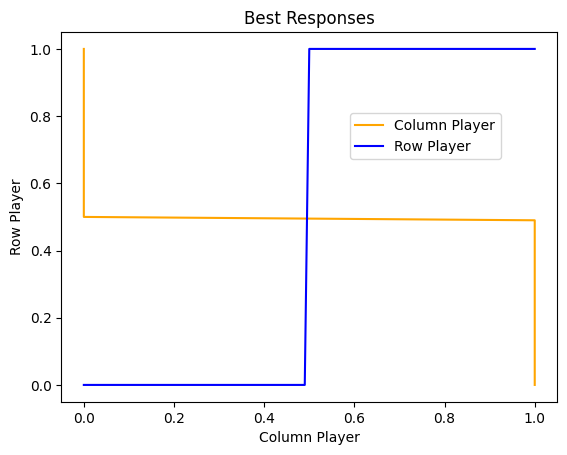

In [4]:
import matplotlib.pyplot as plt

# Column player actions
x_values = [sublist[1] for sublist in col_best_responses] 
y_values = [sublist[0] for sublist in col_best_responses]
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = y_values  
y_values = [sublist[0] for sublist in row_best_responses]  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
x = 0.9
y = 0.8
plt.legend(loc='upper right', bbox_to_anchor=(x, y))
plt.show()

<h3>Stag Hunt</h3>

In [5]:
A = np.array([[5, 0], [2, 1]])
B = np.array([[5, 2], [0, 1]])

stag = nash.Game(A, B)
#print(stag)

incrs = 0.01
row_best_responses = best_responses(incrs, stag, 1)

print("row:",row_best_responses)

col_best_responses = best_responses(incrs, stag, 2)

print("col:",col_best_responses)


row: [[0, 0], [0, 0.01], [0, 0.02], [0, 0.03], [0, 0.04], [0, 0.05], [0, 0.060000000000000005], [0, 0.07], [0, 0.08], [0, 0.09], [0, 0.09999999999999999], [0, 0.10999999999999999], [0, 0.11999999999999998], [0, 0.12999999999999998], [0, 0.13999999999999999], [0, 0.15], [0, 0.16], [0, 0.17], [0, 0.18000000000000002], [0, 0.19000000000000003], [0, 0.20000000000000004], [0, 0.21000000000000005], [0, 0.22000000000000006], [0, 0.23000000000000007], [0, 0.24000000000000007], [1.0000000000000007, 0.25000000000000006], [1.0000000000000007, 0.26000000000000006], [1.0000000000000007, 0.2700000000000001], [1.0000000000000007, 0.2800000000000001], [1.0000000000000007, 0.2900000000000001], [1.0000000000000007, 0.3000000000000001], [1.0000000000000007, 0.3100000000000001], [1.0000000000000007, 0.3200000000000001], [1.0000000000000007, 0.3300000000000001], [1.0000000000000007, 0.34000000000000014], [1.0000000000000007, 0.35000000000000014], [1.0000000000000007, 0.36000000000000015], [1.00000000000000

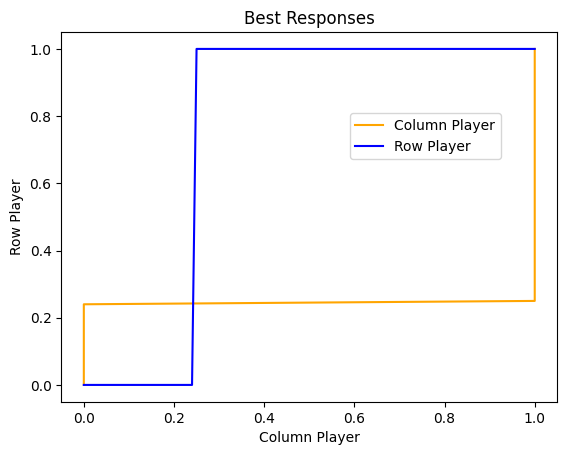

In [6]:
import matplotlib.pyplot as plt

# Column player actions
x_values = [sublist[1] for sublist in col_best_responses] 
y_values = [sublist[0] for sublist in col_best_responses]
plt.plot(x_values, y_values, marker='', color="orange", label="Column Player")
# Row player actions
x_values = y_values  
y_values = [sublist[0] for sublist in row_best_responses]  
plt.plot(x_values, y_values, marker='', color="blue", label="Row Player")

plt.xlabel('Column Player')
plt.ylabel('Row Player')
plt.title('Best Responses')
x = 0.9
y = 0.8
plt.legend(loc='upper right', bbox_to_anchor=(x, y))
plt.show()

<h3>Nash Equilibria - Ramo</h3>
<p>A function exists in Ramo to determine if nash equilibria is achieved by players in a NFG. This function deteremines if the action probabilities used by the players result in equilibrium where incentive to change for both does not exist.</p> 

In [13]:
import numpy as np
from ramo.game.monfg import MONFG
from ramo.utility_function.functions import get_u
from ramo.strategy.best_response import calc_best_response
from ramo.nash.verify import verify_nash


def u_linear(w):
    return lambda p: (p[0] * w) + (p[1] * (1-w))


# prisoner's dilemma
payoffs = [np.array([[(2, 0), (0, 0)],
                     [(3, 0), (1, 0)]], dtype=float),
           np.array([[(0, 2), (0, 3)],
                     [(0, 0), (0, 1)]], dtype=float)]

# stag hunt
# payoffs = [np.array([[(5, 0), (0, 0)],
#                      [(2, 0), (1, 0)]], dtype=float),
#            np.array([[(0, 5), (0, 2)],
#                      [(0, 0), (0, 1)]], dtype=float)]

game = MONFG(payoffs)
row_player = 0  
col_player = 1  
row_payoffs = game.get_payoff_matrix(row_player)
col_payoffs = game.get_payoff_matrix(col_player)

w1_row = 1.0 
w1_col = 0.0

u_row = u_linear(w1_row)
u_col = u_linear(w1_col)
u_tpl = (u_row, u_col)

row_best=[]
col_best=[]
increments=[]
incr = 0
while incr <= 1:
    joint_strategy = [np.array([incr, 1-incr]), np.array([incr, 1-incr])]
    vNE = verify_nash(game, u_tpl, joint_strategy)
    print(joint_strategy)
    print(vNE)
    incr += 0.25

[array([0, 1]), array([0, 1])]
True
[array([0.25, 0.75]), array([0.25, 0.75])]
False
[array([0.5, 0.5]), array([0.5, 0.5])]
False
[array([0.75, 0.25]), array([0.75, 0.25])]
False
[array([1., 0.]), array([1., 0.])]
False


<p>
Result is as expected. Nash Equilibrium is achieved in the NFG Prisoner Dilemma is both players defect - action probability on cooperate is 0 for both players, and action probability on defect is 1 for both players - [cooperate, defect]: [0, 1]. 
</p>
<p>
Performed a test with Stag Hunt. Results were as expected. Using increments of 0.25, Nash is achieved when both players set action probabilities at [0, 1], [1, 0] and [0.25, 0.75] for [stag, hare].
</p>

<h3>Nash Equilibria - Nashpy</h3>
<p>A function also exists in Nashpy to determine Nash Equilibria in an NFG.</p>

In [9]:
import nashpy as nash
import numpy as np

# prisoner dilemma
A = np.array([[2, 0], [3, 1]])
B = np.array([[2, 3], [0, 1]])

nfg = nash.Game(A, B)

ne = nfg.support_enumeration()
print("Prisoner")
list(ne)

Prisoner


[(array([0., 1.]), array([0., 1.]))]

In [10]:
# stag hunt
A = np.array([[5, 0], [2, 1]])
B = np.array([[5, 2], [0, 1]])

nfg = nash.Game(A, B)

ne = nfg.support_enumeration()
print("Stag")
list(ne)

Stag


[(array([1., 0.]), array([1., 0.])),
 (array([0., 1.]), array([0., 1.])),
 (array([0.25, 0.75]), array([0.25, 0.75]))]